# Colotectal cancer classification using transferlearn mobilenet

## importing tensorflow hub

###### tensorflow hub is used for importing various pre-made models 

In [1]:
#!pip3 install tensorflow_hub --user
import tensorflow_hub as hub

## Getting required imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical,get_file
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping

# Importing mobile net 

In [3]:
URL = "https://tfhub.dev/google/imagenet/mobilenet_v1_075_192/quantops/feature_vector/3"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(192,192,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
classes =  (os.listdir('cancer/coloncancerdatasetRGB/'))
classes

['06_MUCOSA',
 '01_TUMOR',
 '02_STROMA',
 '05_DEBRIS',
 '08_EMPTY',
 '07_ADIPOSE',
 '04_LYMPHO',
 '03_COMPLEX']

## Making training and validation sets

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                               validation_split=0.2)

training_set = train_datagen.flow_from_directory('~/dataset/coloncancerdatasetRGB/',
                                                     target_size = (192,192),
                                                     classes=classes,
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     subset='training')
val_data = train_datagen.flow_from_directory('~/dataset/coloncancerdatasetRGB/',
                                                     target_size = (192,192),
                                                     classes=(classes),
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                       subset='validation')

Found 3600 images belonging to 8 classes.
Found 900 images belonging to 8 classes.


In [10]:
np_clases=np.array(classes)

## visulation of data

In [11]:
def show_batch(image_batch,label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax=plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(np_clases[label_batch[n]==1][0].title())
        plt.axis('off')

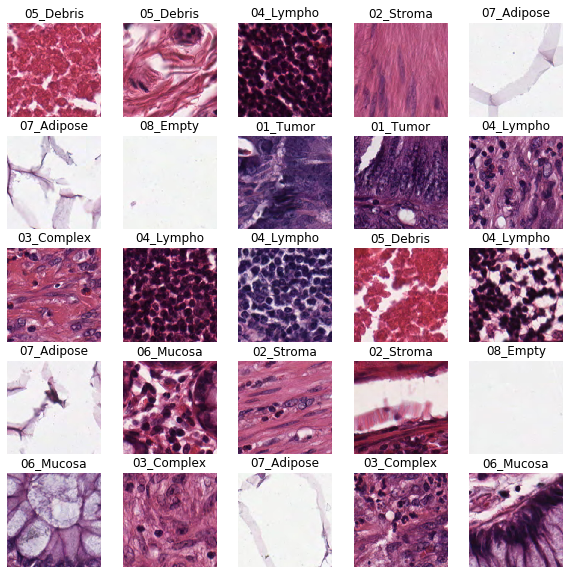

In [12]:
image_batch,label_batch =next(training_set)
show_batch(image_batch,label_batch)

## Preparing model

In [13]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(8, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 768)               1833084   
_________________________________________________________________
dense (Dense)                (None, 8)                 6152      
Total params: 1,839,236
Trainable params: 6,152
Non-trainable params: 1,833,084
_________________________________________________________________


## Setting model parameters

In [14]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

# Training the model

In [15]:
EPOCHS = 6
history = model.fit_generator(training_set,
                    epochs=EPOCHS,
                    validation_data=val_data)

Epoch 1/6
113/113 [==============================] - 169s 1s/step - loss: 0.8497 - accuracy: 0.7236 - val_loss: 0.4674 - val_accuracy: 0.8589
Epoch 2/6
113/113 [==============================] - 185s 2s/step - loss: 0.3790 - accuracy: 0.8803 - val_loss: 0.3629 - val_accuracy: 0.8778
Epoch 3/6
113/113 [==============================] - 215s 2s/step - loss: 0.3024 - accuracy: 0.9050 - val_loss: 0.3149 - val_accuracy: 0.9011
Epoch 4/6
113/113 [==============================] - 765s 7s/step - loss: 0.2580 - accuracy: 0.9194 - val_loss: 0.2835 - val_accuracy: 0.9078
Epoch 5/6
113/113 [==============================] - 1048s 9s/step - loss: 0.2303 - accuracy: 0.9311 - val_loss: 0.2657 - val_accuracy: 0.9111
Epoch 6/6
113/113 [==============================] - 774s 7s/step - loss: 0.2074 - accuracy: 0.9375 - val_loss: 0.2827 - val_accuracy: 0.9156


# testing our trained model 

## Getting the test data

In [16]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_data = test_datagen.flow_from_directory('~/dataset/coloncancerdatasetRGBTest/',
                                                     target_size = (192,192),
                                                     classes=classes,
                                                     batch_size = 32,
                                                     class_mode = 'categorical')

Found 500 images belonging to 8 classes.


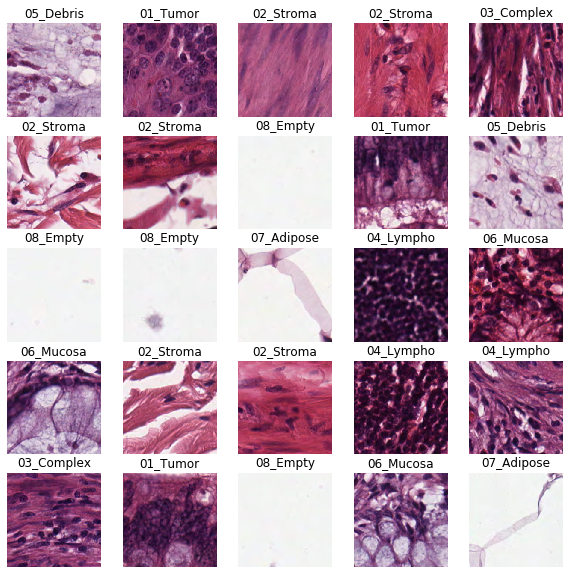

In [58]:
test_image_batch,test_label_batch =next(test_data)
show_batch(test_image_batch,test_label_batch)

### Evaluating the model on test data

In [45]:
test_accu = model.evaluate_generator(test_data)

In [47]:
test_accu

[0.2634345483966172, 0.918]

In [46]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 91.79999828338623 %


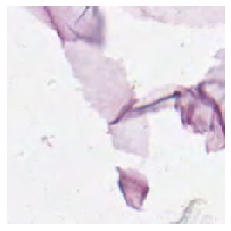

In [80]:
path=os.path.join('/home/saiprasad/cancer/coloncancerdatasetRGBTest/','07_ADIPOSE','16EE2_CRC-Prim-HE-03_012.tif_Row_601_Col_1351.tif')
def load_image(img_path, show=False):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=(192, 192))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      
    
    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
new_img=load_image(path,show=True)
classe=model.predict_classes(new_img)


In [43]:
np_clases[classe]

array(['07_ADIPOSE'], dtype='<U10')

In [73]:
test_data.filenames

['06_MUCOSA/10D41_CRC-Prim-HE-09_001.tif_Row_2401_Col_1651.tif',
 '06_MUCOSA/10D83_CRC-Prim-HE-06_001.tif_Row_451_Col_151.tif',
 '06_MUCOSA/10DB6_CRC-Prim-HE-05.tif_Row_1351_Col_1051.tif',
 '06_MUCOSA/10E6D_CRC-Prim-HE-07_001.tif_Row_151_Col_601.tif',
 '06_MUCOSA/10E8E_CRC-Prim-HE-09_001.tif_Row_1351_Col_1051.tif',
 '06_MUCOSA/10E93_CRC-Prim-HE-08_025.tif_Row_151_Col_1.tif',
 '06_MUCOSA/10F22_CRC-Prim-HE-05_001.tif_Row_301_Col_751.tif',
 '06_MUCOSA/10F53_CRC-Prim-HE-07_001.tif_Row_451_Col_2551.tif',
 '06_MUCOSA/11A02_CRC-Prim-HE-06_033.tif_Row_751_Col_151.tif',
 '06_MUCOSA/11A6B_CRC-Prim-HE-03_006.tif_Row_601_Col_601.tif',
 '06_MUCOSA/11B08_CRC-Prim-HE-05_001.tif_Row_1_Col_1051.tif',
 '06_MUCOSA/11C03_CRC-Prim-HE-06_001.tif_Row_1501_Col_1.tif',
 '06_MUCOSA/11C84_CRC-Prim-HE-07_001.tif_Row_901_Col_1351.tif',
 '06_MUCOSA/11CB1_CRC-Prim-HE-07_001.tif_Row_601_Col_3001.tif',
 '06_MUCOSA/11CBE_CRC-Prim-HE-03_006.tif_Row_601_Col_1651.tif',
 '06_MUCOSA/11CB_CRC-Prim-HE-06_032.tif_Row_601_Col_1

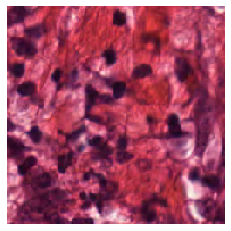

[7]
7


In [106]:
img=load_image('dataset/coloncancerdatasetRGBTest/{}'.format(test_data.filenames[490]),True)
predicted_classes=model.predict_classes(img)
print(predicted_classes)
print(test_data.labels[490])